In [2]:
import numpy as np
import yfinance as yf
import pandas as pd 
import math

In [9]:
ticker_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [11]:
tickers = ticker_df.Symbol.to_list()

In [12]:
df = yf.download(tickers, start = "2013-01-01")["Adj Close"]

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [13]:
df = df.dropna(axis=1)

In [14]:
monthlyreturn = (df.pct_change()+1)[1:].resample("M").prod()

In [15]:
yearlyreturn = monthlyreturn.rolling(12).apply(np.prod)

In [16]:
def gettop20(date):
    top20 = yearlyreturn.loc[date].nlargest(20).index
    return top20

In [17]:
def pnl(date):
    pnl = monthlyreturn.loc[date:,gettop20(date)][1:2]
    return pnl.mean(axis=1).values[0]

1.0599976790014507

In [44]:
returns = []
for date in monthlyreturn.index[12:-1]:
    returns.append(pnl(date))

In [46]:
performance = pd.Series(returns, index=monthlyreturn.index[12:-1]).cumprod()
performance = performance.to_frame(name="quant")
performance.tail()

,quant
Date,
2022-09-30,7.217756
2022-10-31,7.232280
2022-11-30,6.847473
2022-12-31,7.128351
2023-01-31,6.872728


In [21]:
nasI = yf.download("^GSPC",start = "2014-1-1")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [39]:
Index_monthlyreturn = (nasI.pct_change()+1)[1:].resample("M").prod()


In [40]:
performance["S&P"] = Index_monthlyreturn

<AxesSubplot:xlabel='Date'>

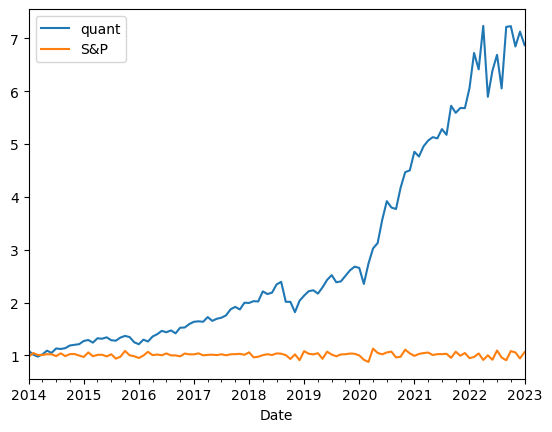

In [41]:
performance.plot()